In [2]:
import pickle
import matplotlib.pyplot as plt
import pickle
import networkx as nx
import  functools
import math
import numpy as np
import os
from decimal import Decimal

In [3]:
import operator as op
def nCr(n,r):
    f = math.factorial
    return Decimal(f(n)) / (Decimal(f(r)) * Decimal(f(n-r)))

def calculatep(N,k,pi):
    return nCr(N-1,k)*Decimal(pow(pi,k))*Decimal(pow(1-pi,N-1-k))


def setplot(plt):
   
    ax = plt.subplot(111) 

    ax.spines["top"].set_visible(False)  
    ax.spines["bottom"].set_visible(False)  
    ax.spines["right"].set_visible(False)  
    ax.spines["left"].set_visible(False)

    ax.get_xaxis().tick_bottom()    
    ax.get_yaxis().tick_left()  
    return plt


0


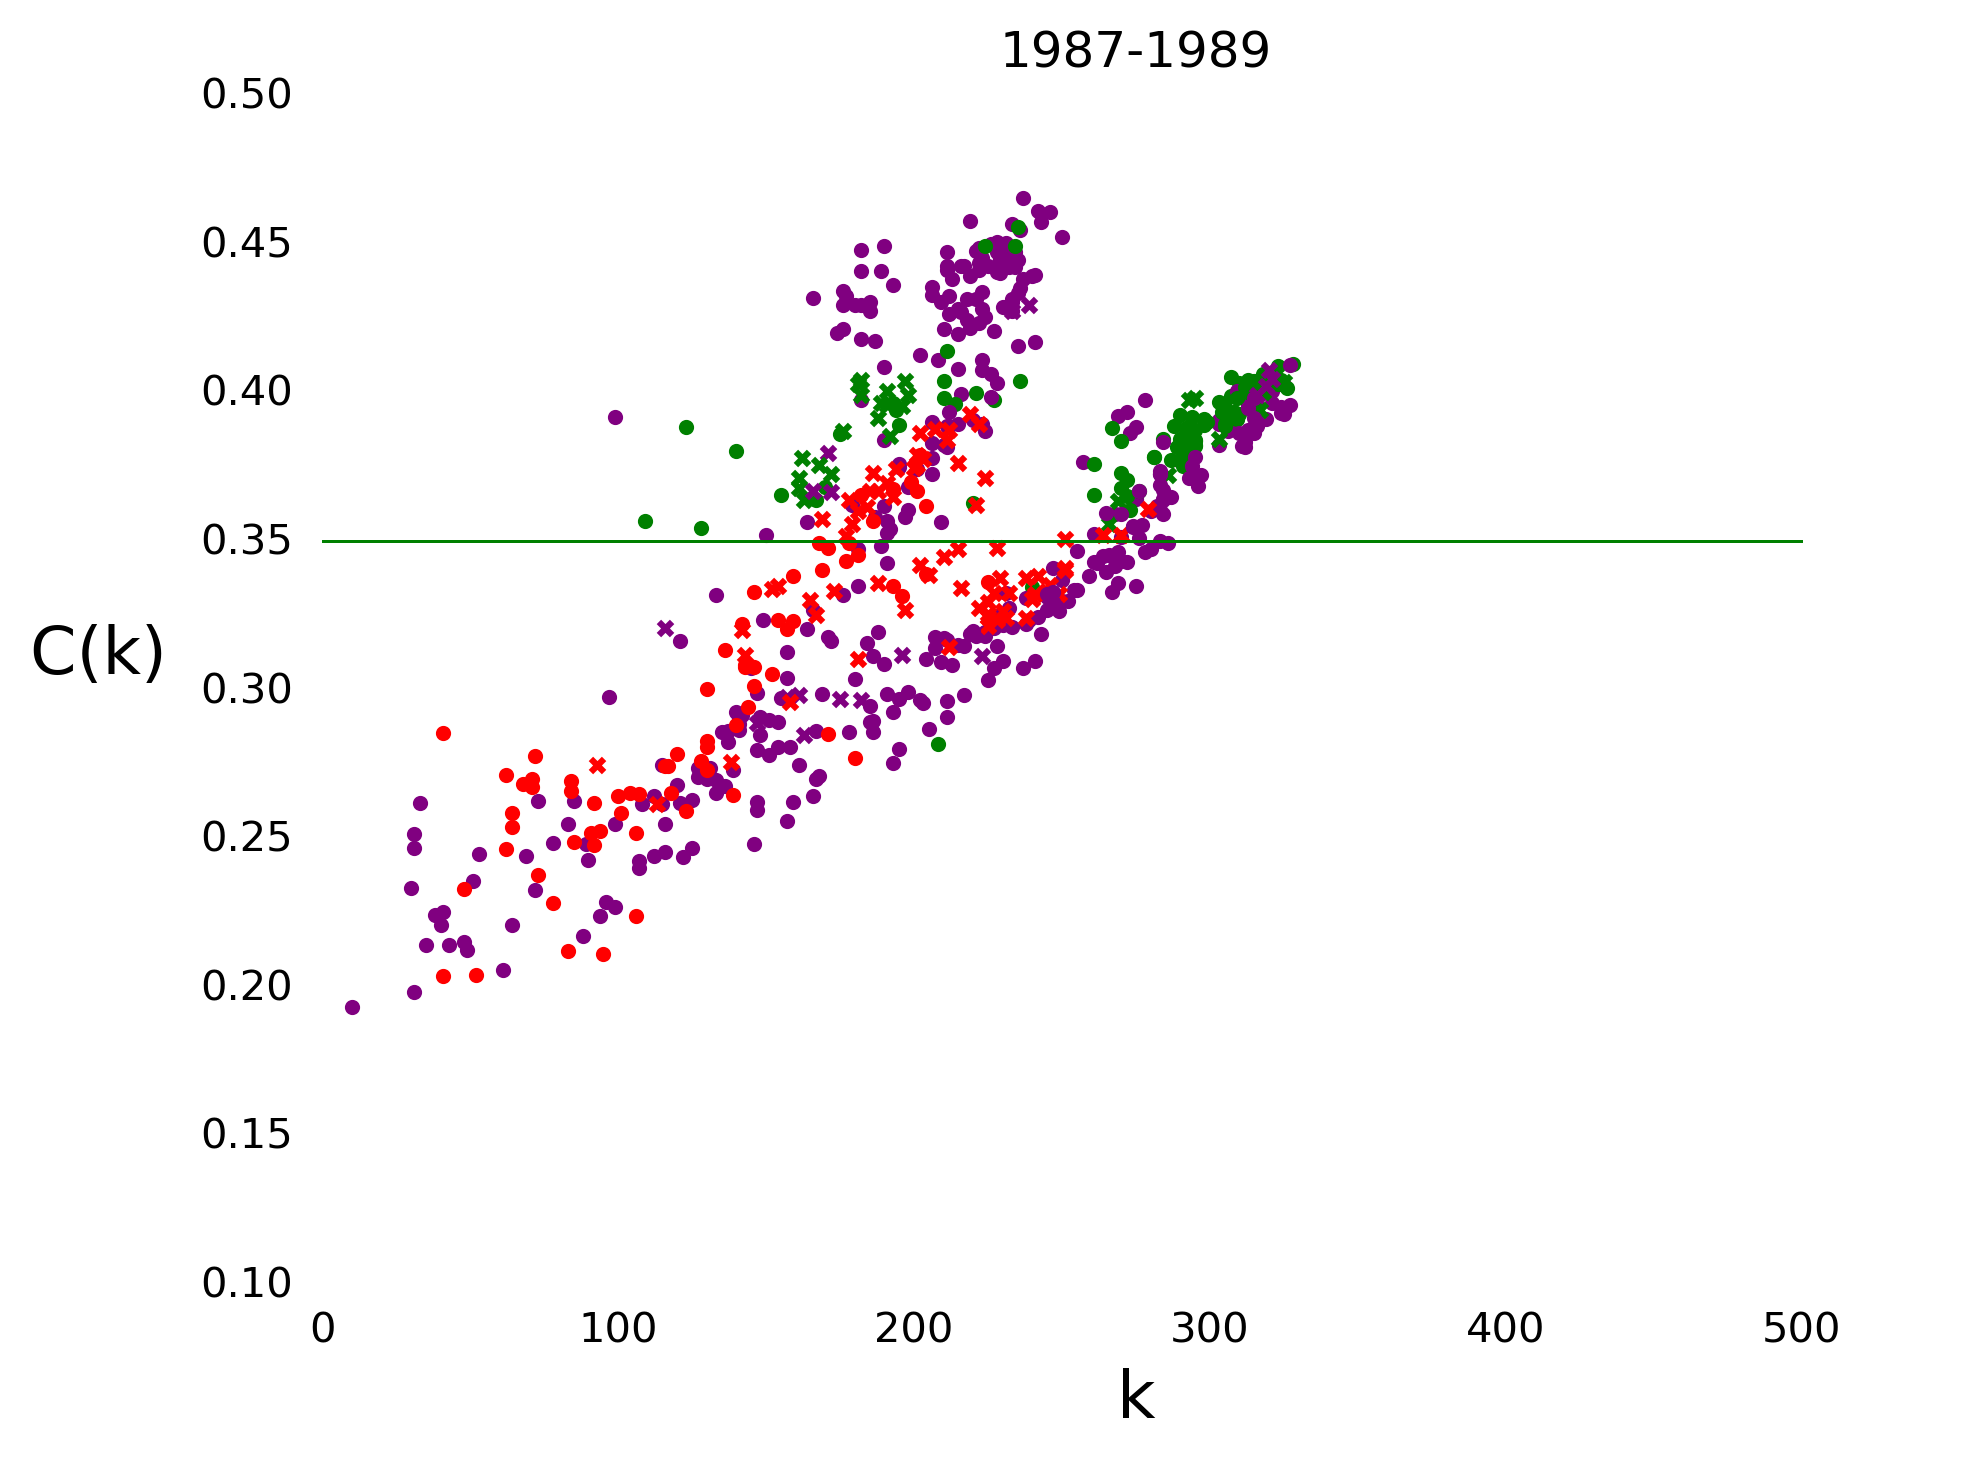

0


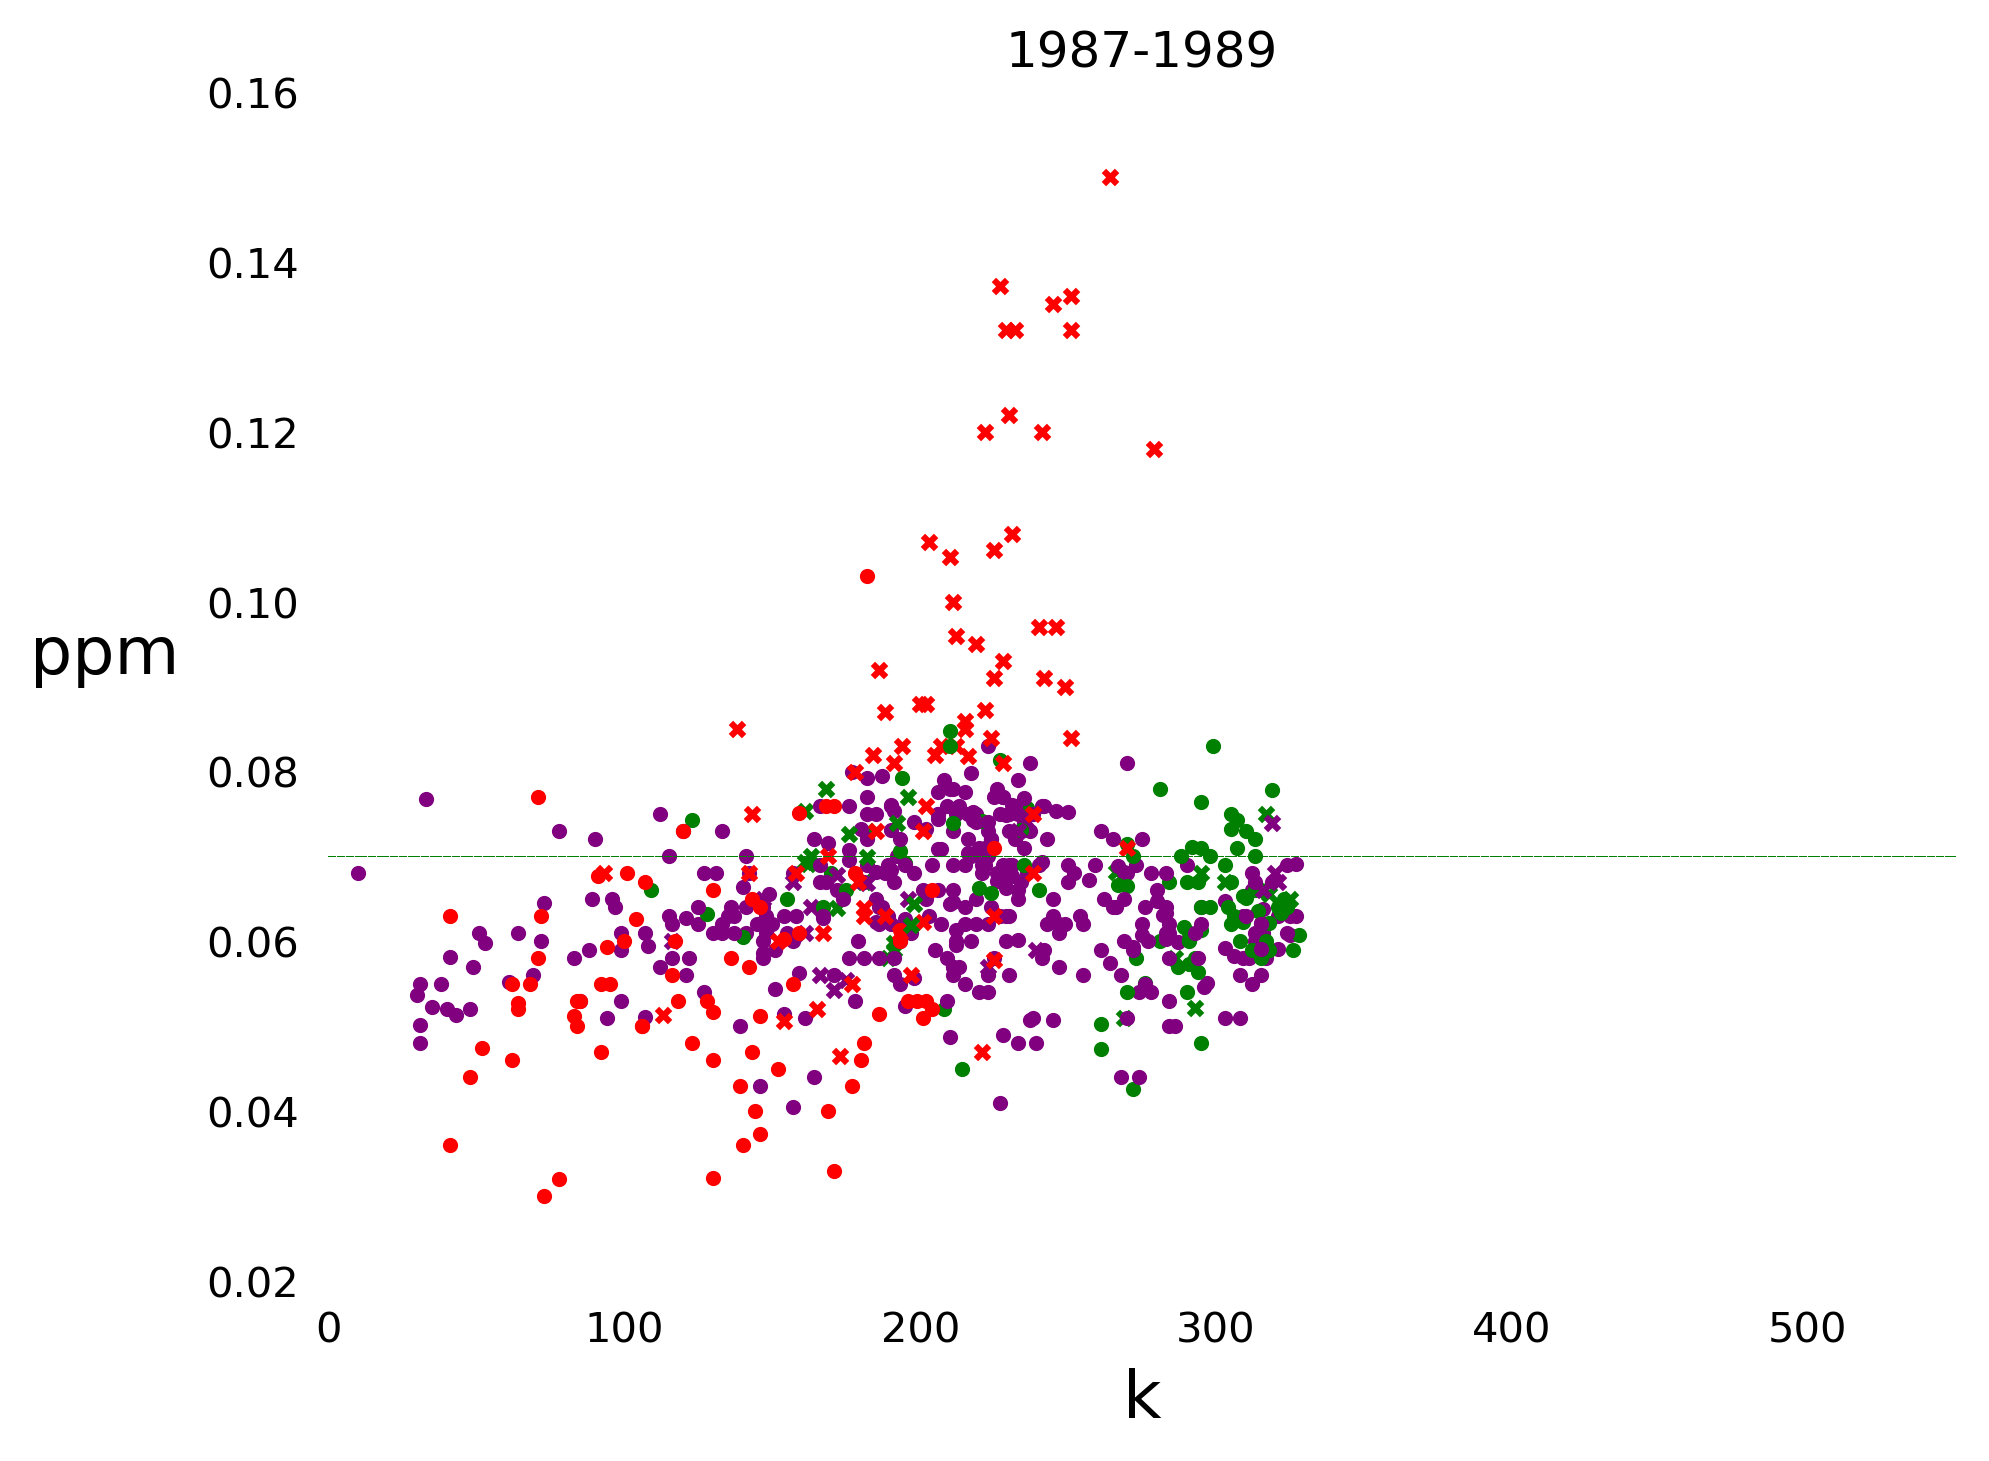

0


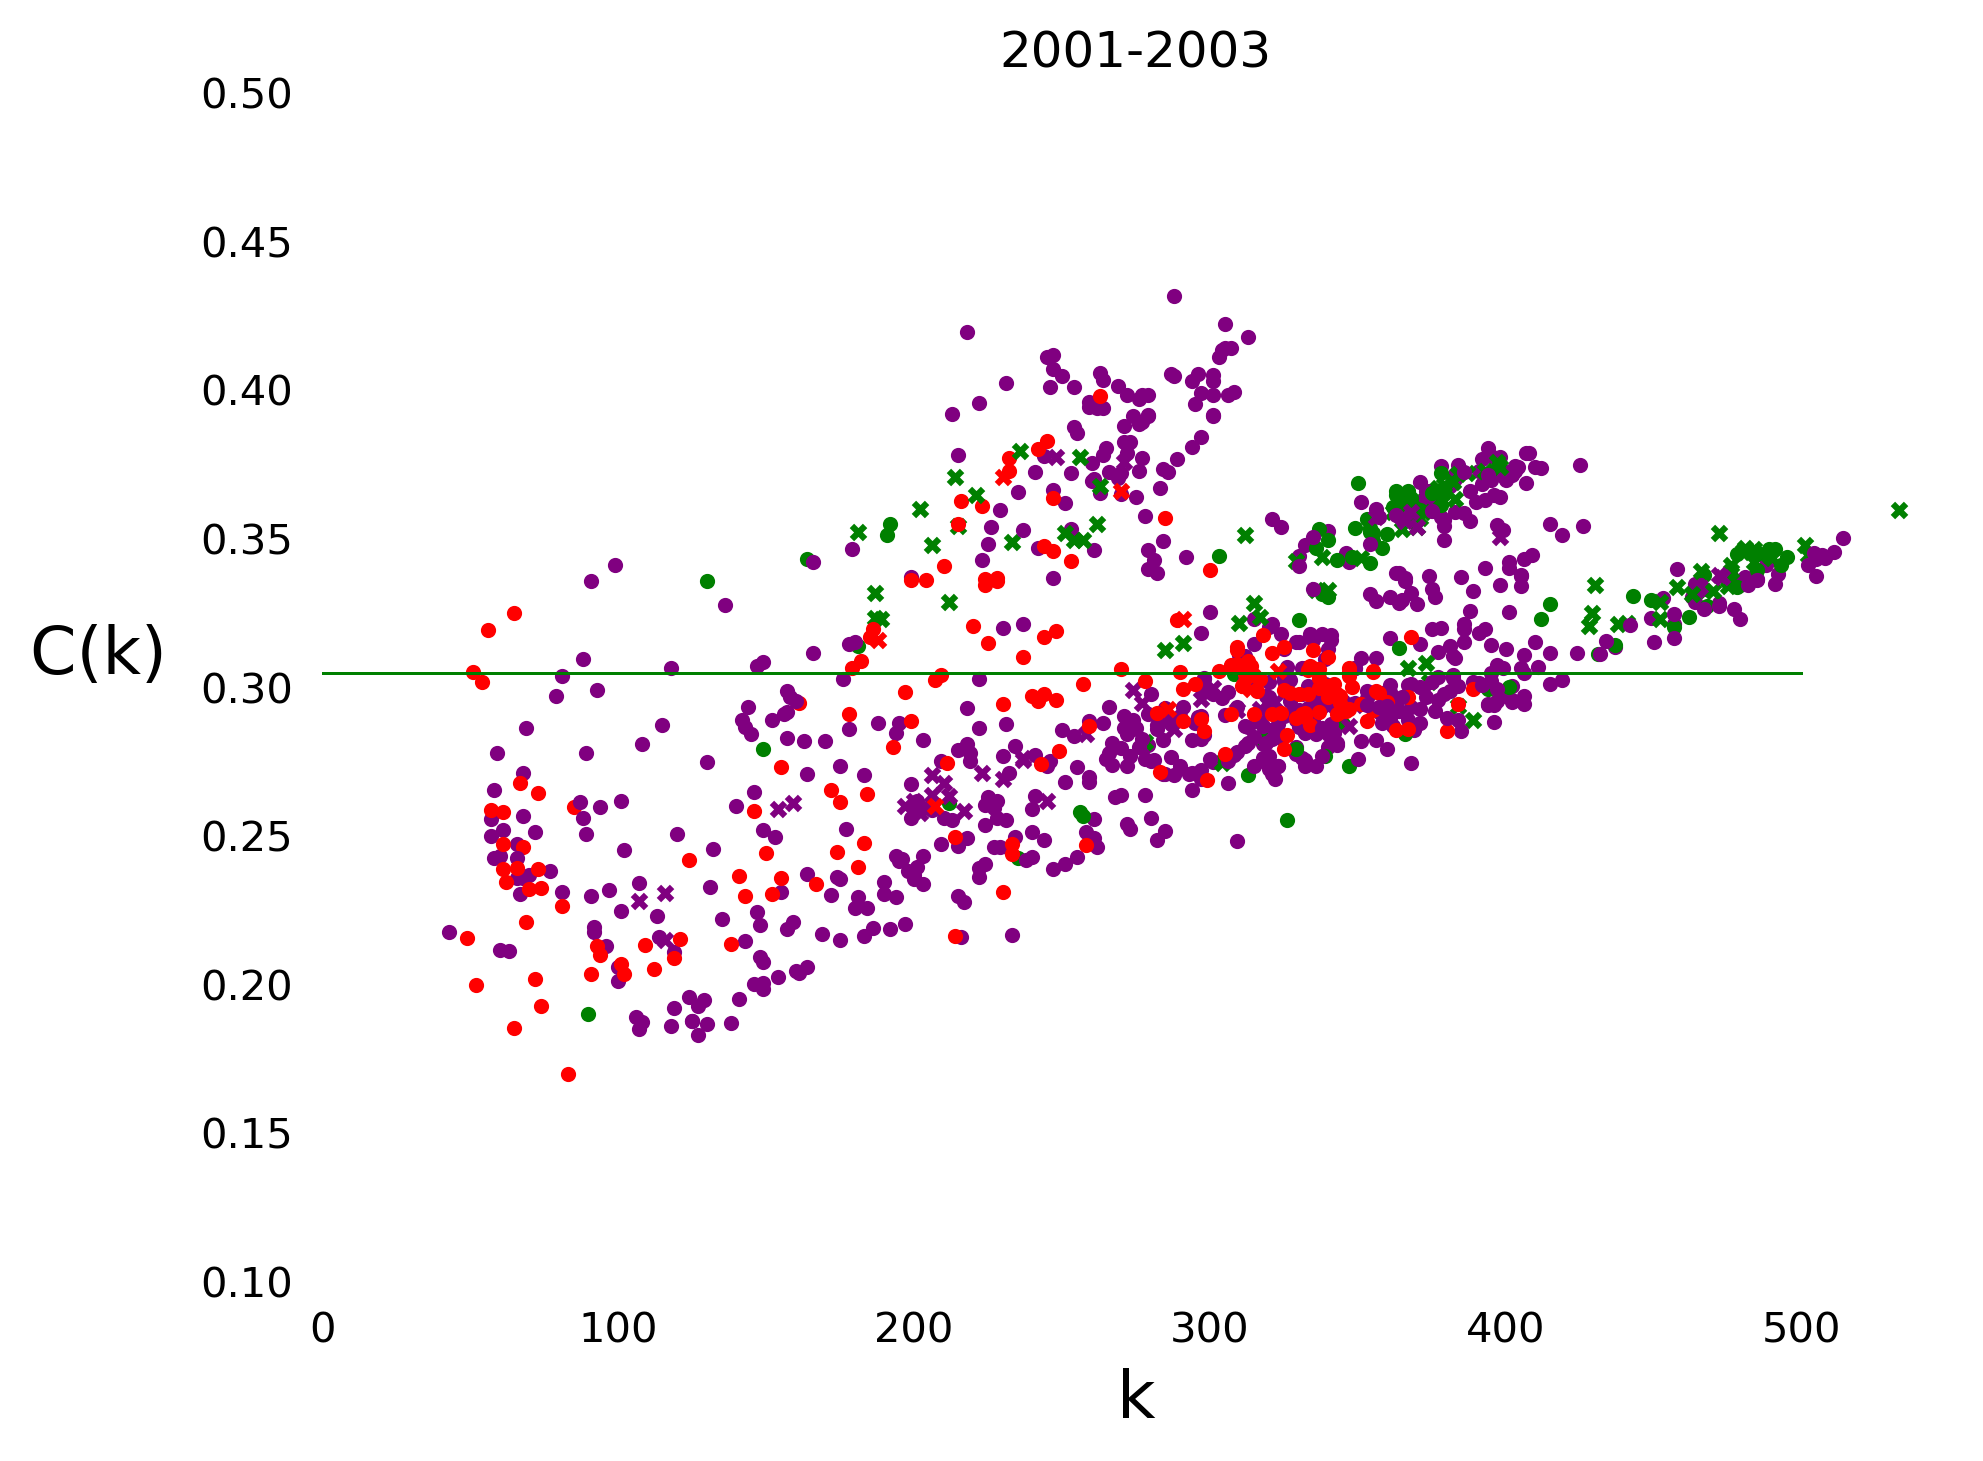

0


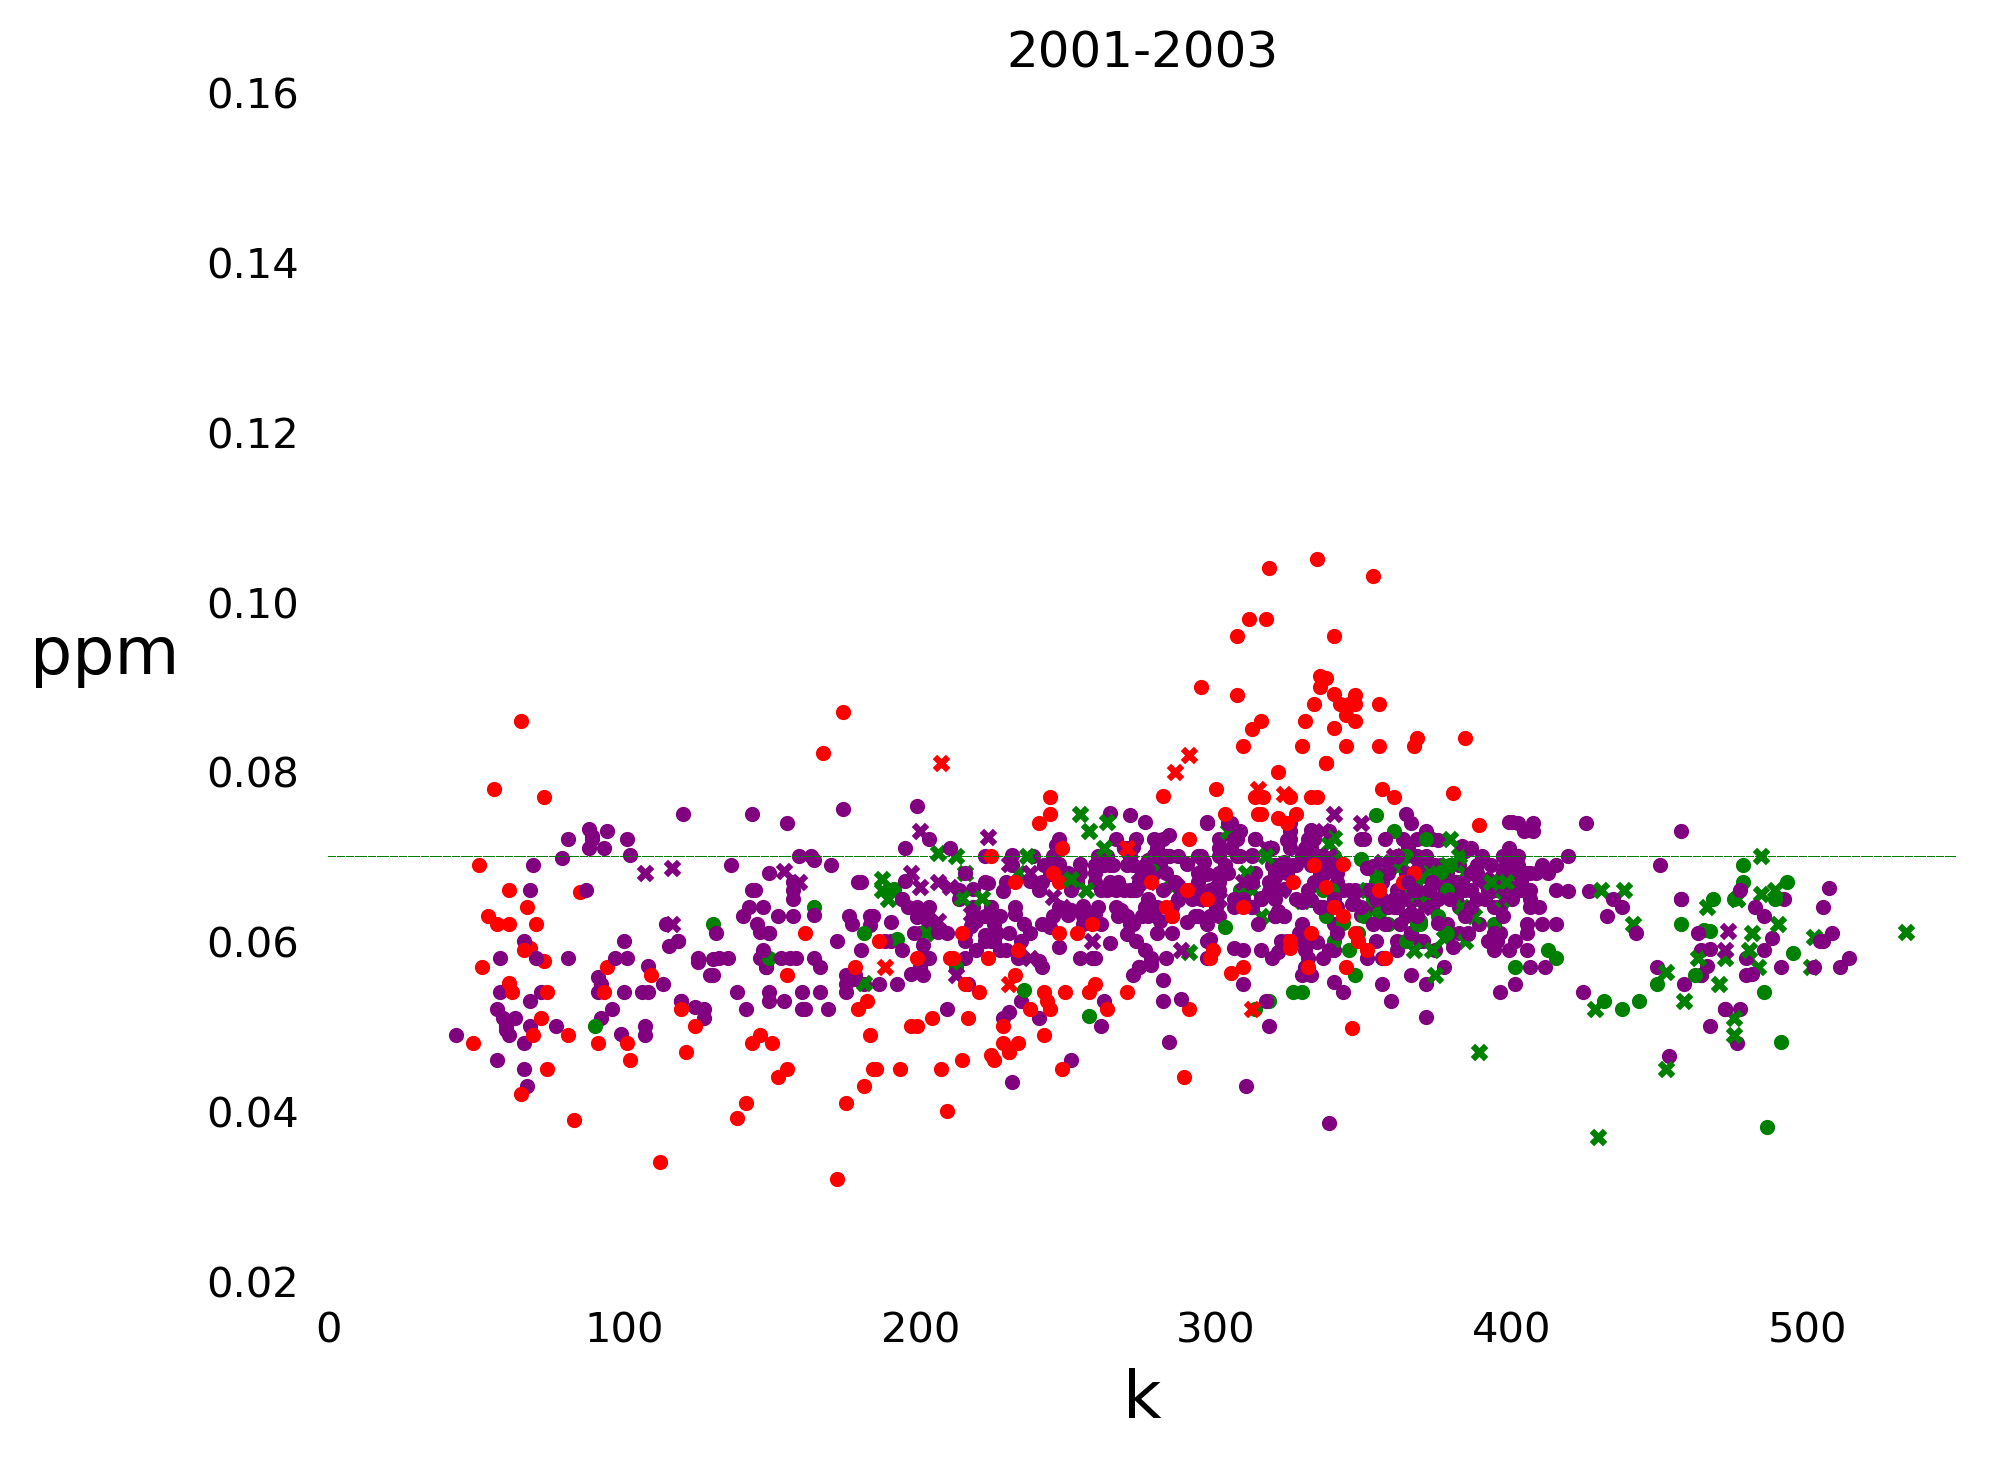

0


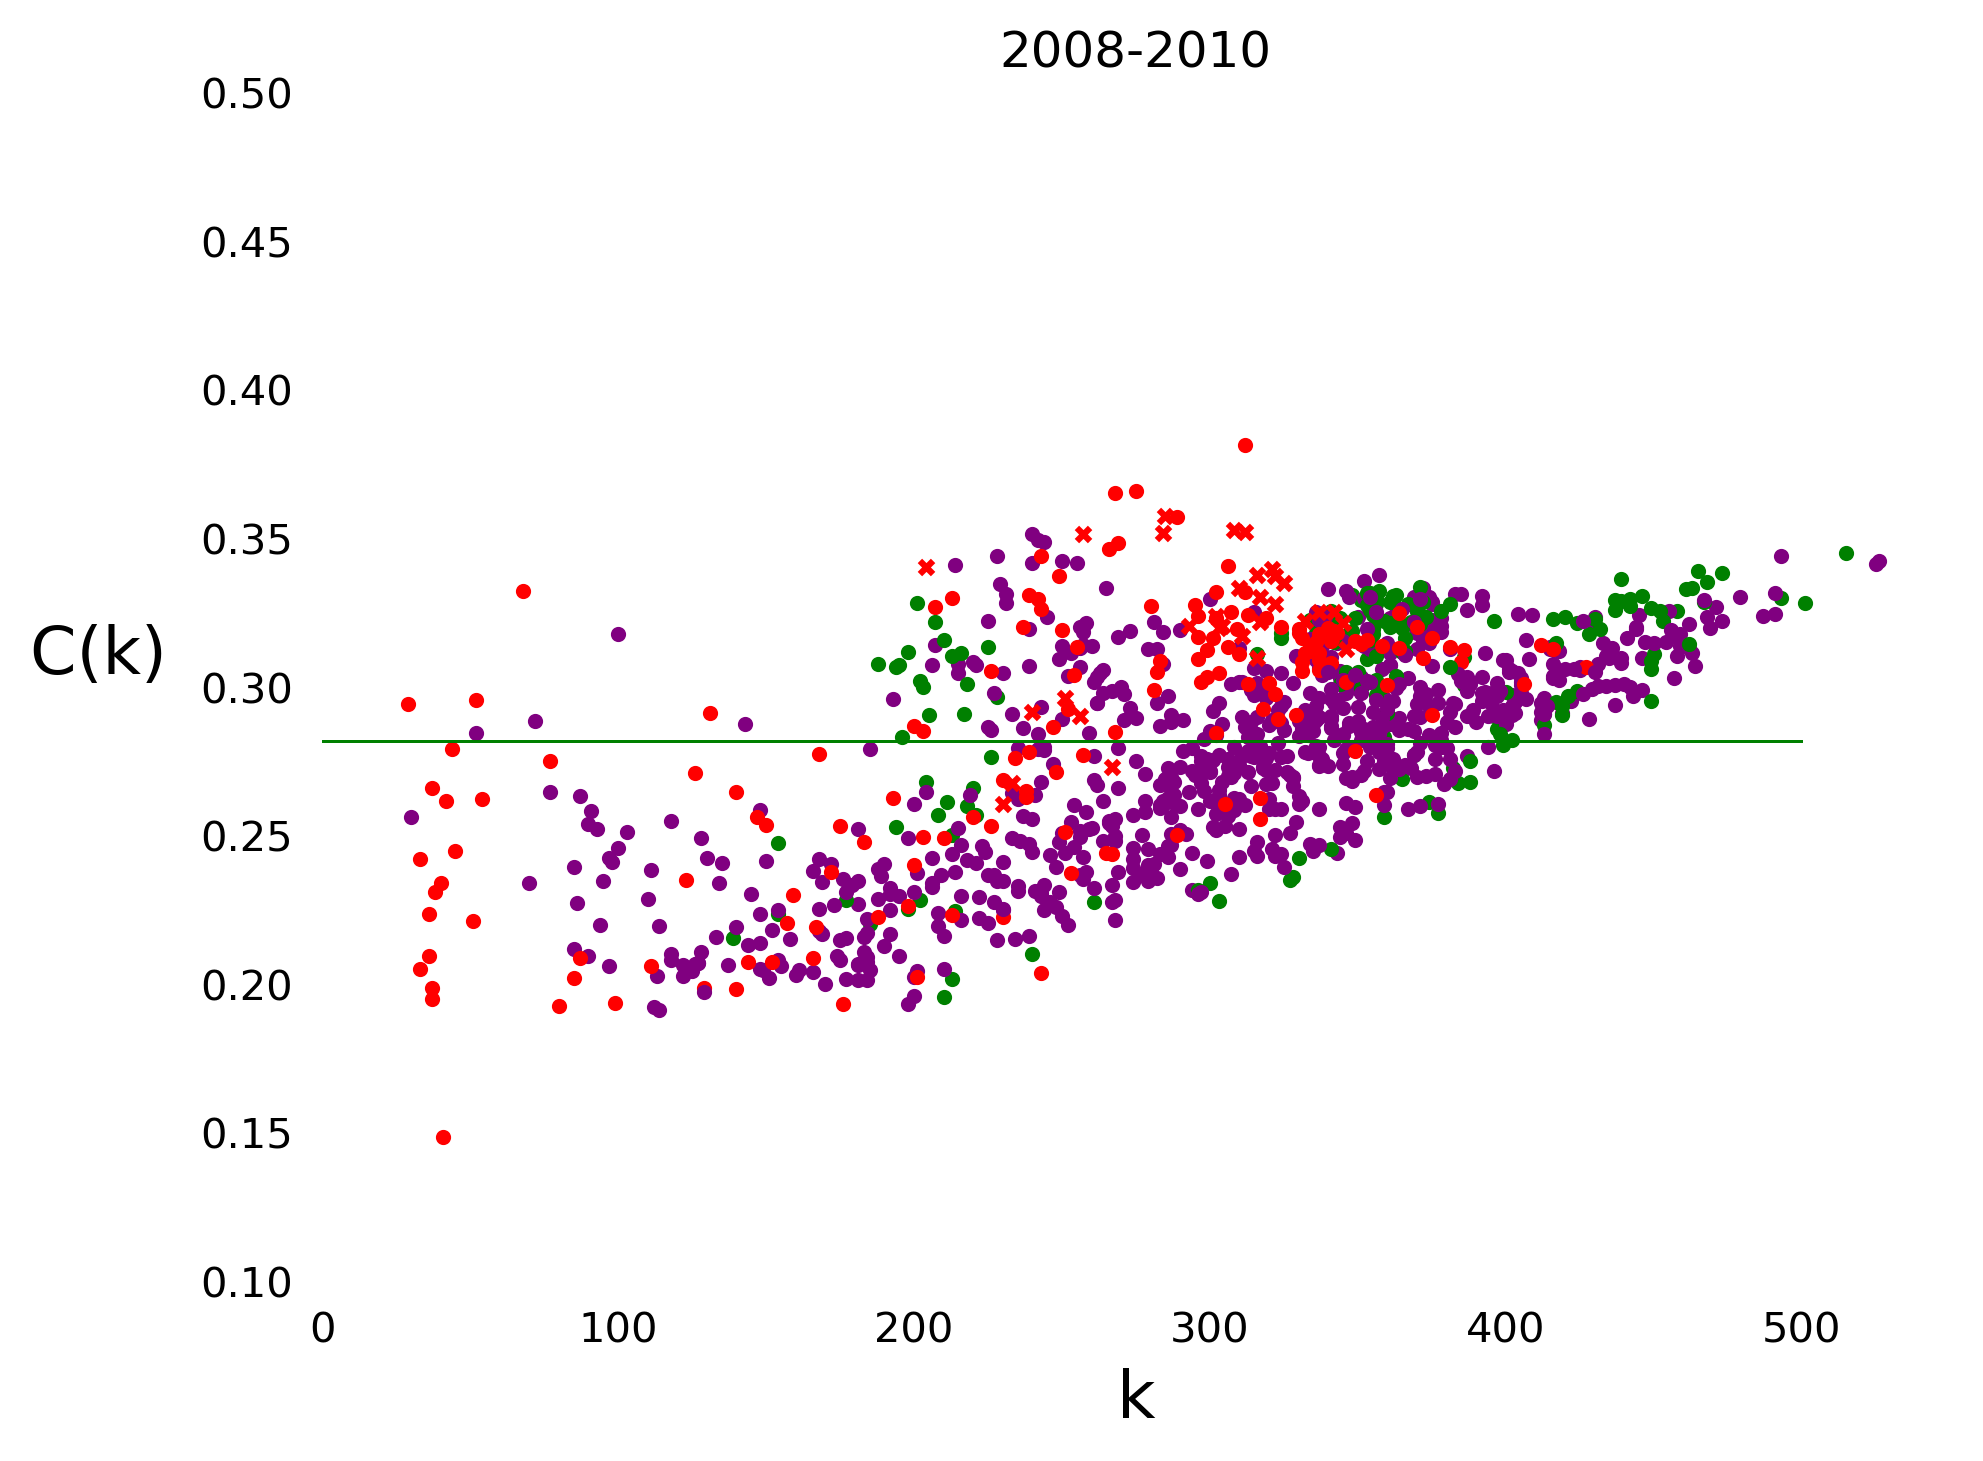

0


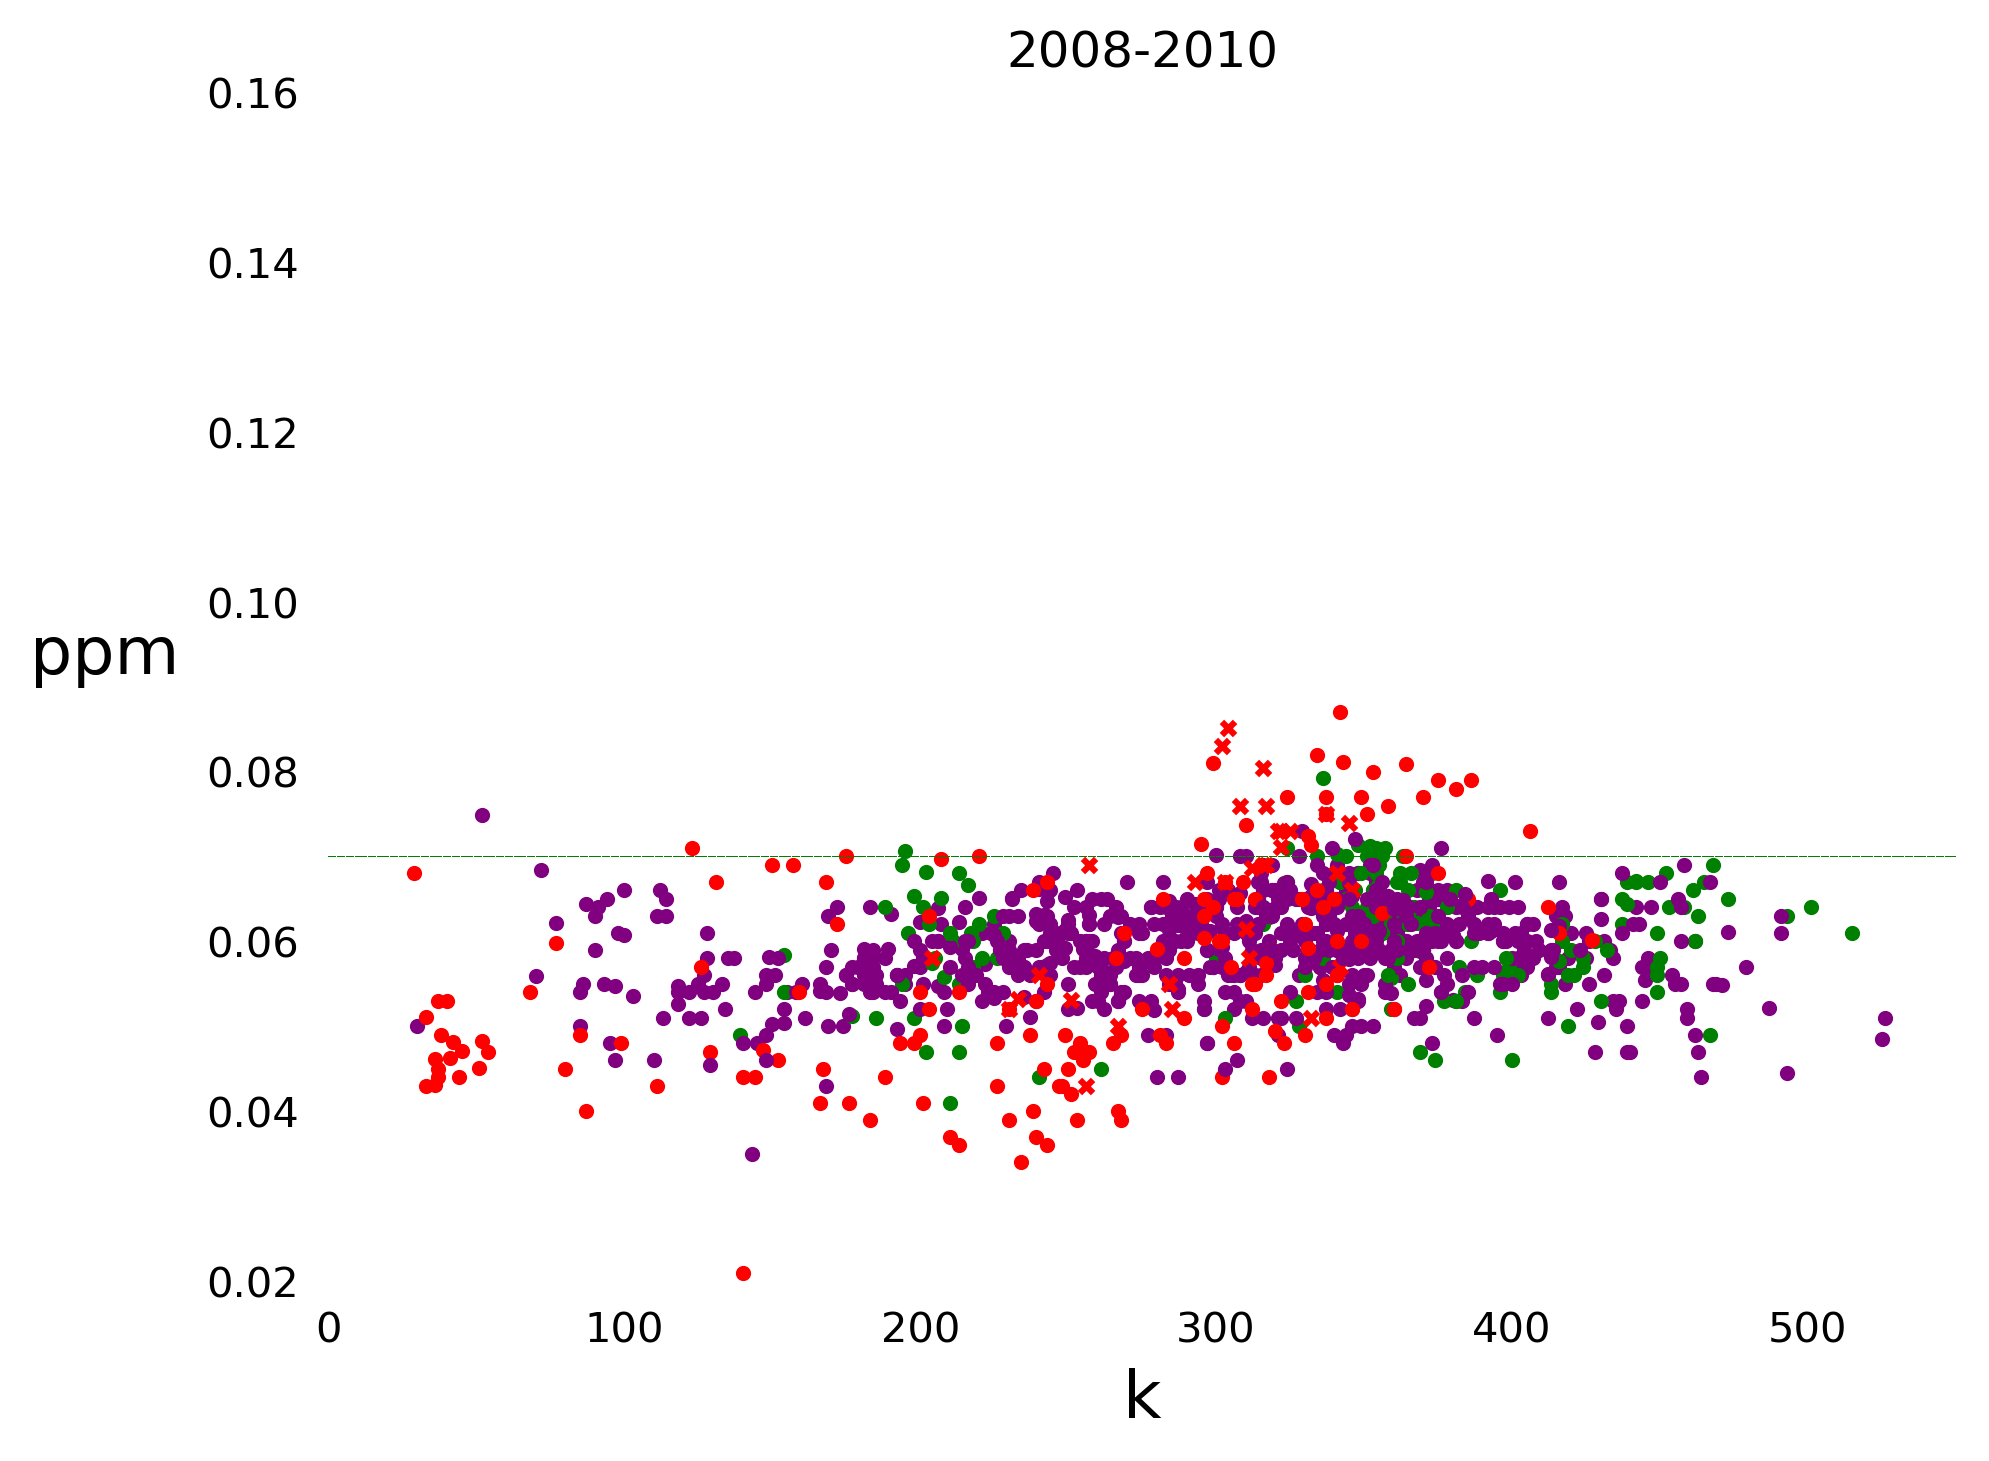

0


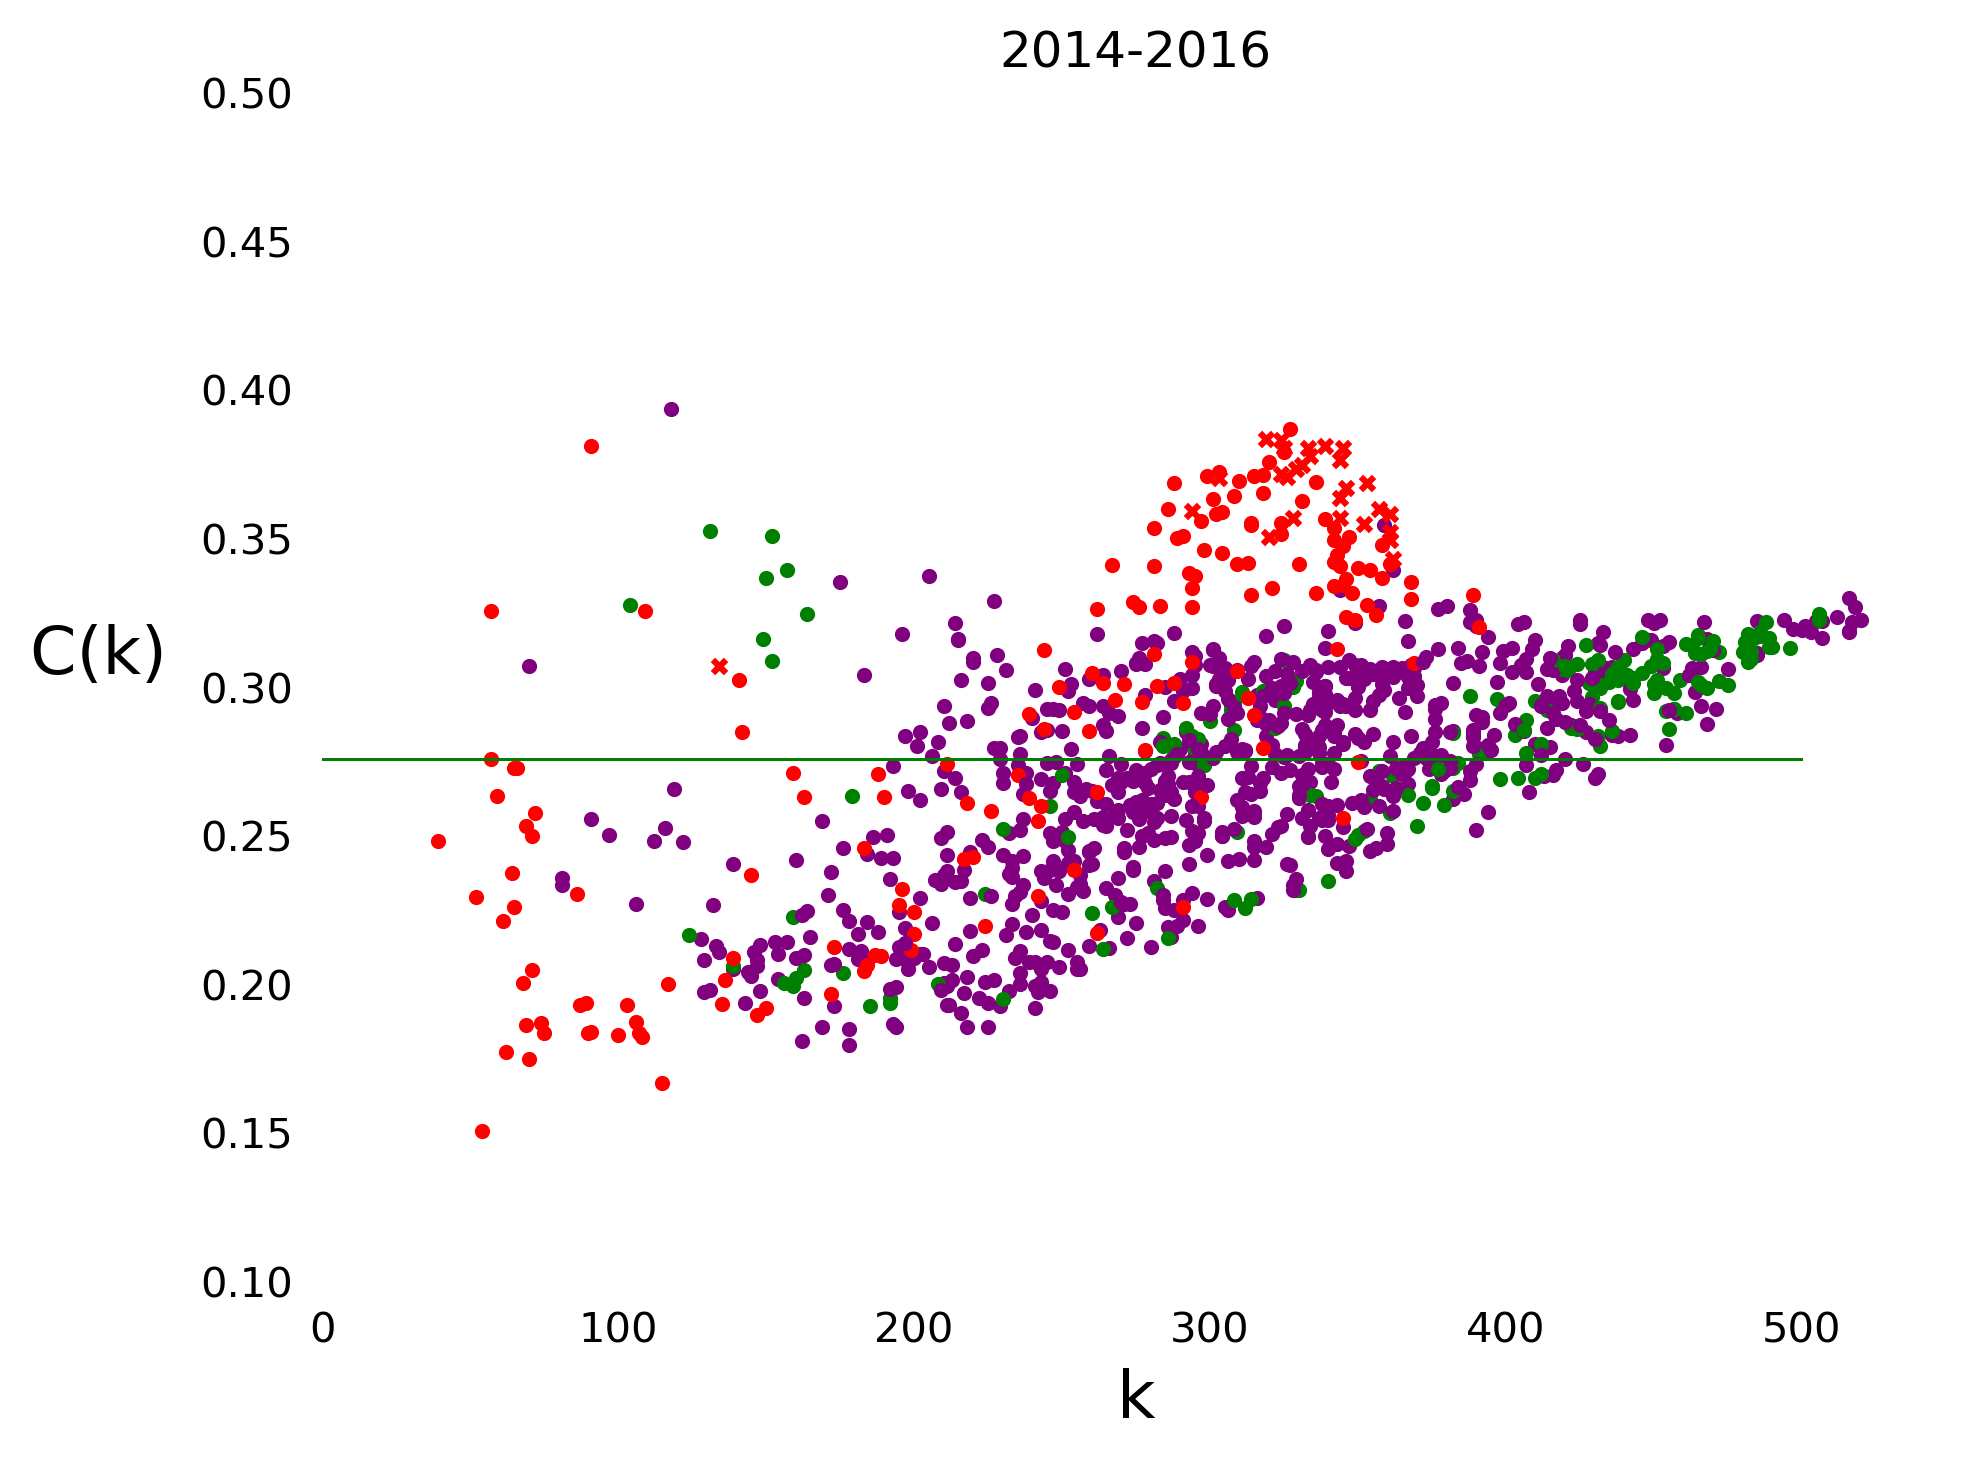

0


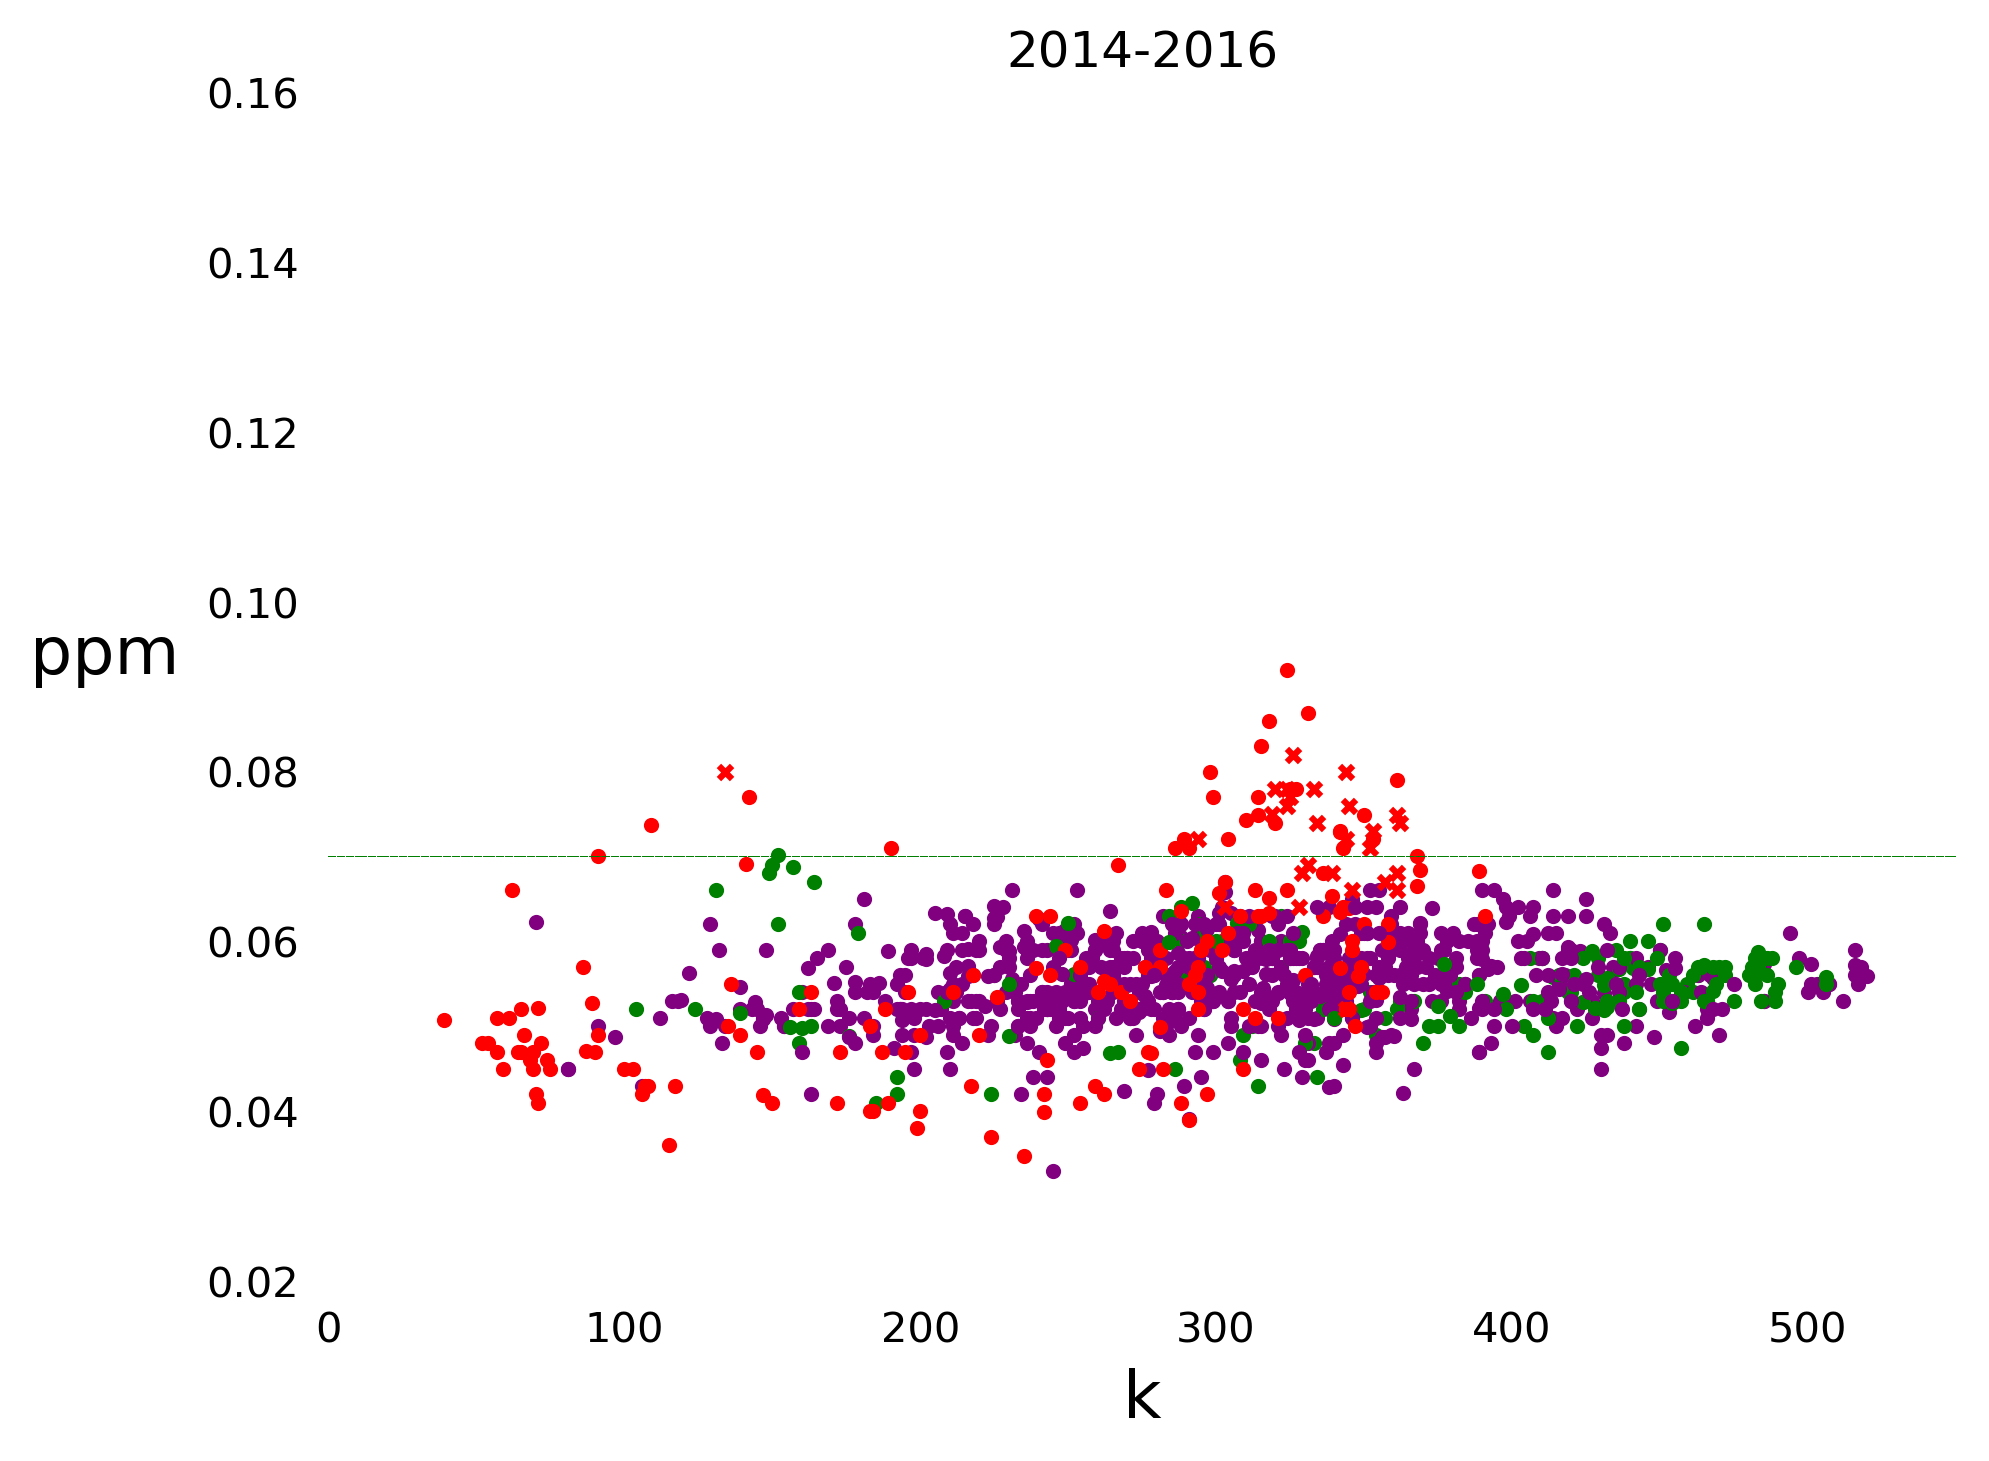

In [4]:
targetDict={"NA/1":"1987-1989","NA/2":"2001-2003","NA/3":"2008-2010","NA/4":"2014-2016",}
f=open('NA/clusteringData.csv','w')

commonNACode=set()
commonNACode_ES=set()
fool=0
for target in targetDict:
   
    targetWrite=targetDict[target]
    endyear=targetWrite.split('-')[1]

    G=pickle.load(open('{}/Graph.pickle'.format(target),"rb"))
    waveMatrix=pickle.load(open('{}/waveMatrix.pickle'.format(target),"rb"))
    skip=pickle.load(open('{}/skip.pickle'.format(target),"rb"))
    nodeNames=pickle.load(open('{}/Correlations/o3/{}/nodeNames.pickle'.format(target,endyear),"rb"))

    networkDetails=open('{}/CorrelationSummary/networkfeautures.csv'.format(target),'r').readline().strip().split(',')

    try:
        cluster=pickle.load(open('{}/cluster.pickle'.format(target),'rb'))
        degree=pickle.load(open('{}/degree.pickle'.format(target),'rb'))
    except:
        cluster=nx.clustering(G,weight='weight')
        degree=nx.degree(G,weight='weight')
        pickle.dump(cluster,open('{}/cluster.pickle'.format(target),'wb'))
        pickle.dump(degree,open('{}/degree.pickle'.format(target),'wb'))

    kmean=float(networkDetails[3])
    pi=float(networkDetails[-2])
    N=len(degree)
    Cavg=float(networkDetails[-1])


    NA=pickle.load(open("{}/NAShrink.pickle".format(target),"rb"))
    label=['Serious','Severe','Extreme']

    NACodeE=[str(int(i.split('/')[0]))+'-'+str(int(i.split('/')[1])) for i in NA.keys() if NA[i].split('-')[0] in label]
    NACode=[str(int(i.split('/')[0]))+'-'+str(int(i.split('/')[1])) for i in NA.keys()]
    
    if fool==0:
        commonNACode=NACode
        commonNACode_ES=NACodeE
        fool=1
    else:
        commonNACode=set(commonNACode).intersection(NACode)
        commonNACode_ES=set(commonNACode_ES).intersection(NACodeE)
        
    NACodeDict={}
    for i in NA.keys():
        key=str(int(i.split('/')[0]))+'-'+str(int(i.split('/')[1]))
        NACodeDict[key]=NA[i]

    # 10th P, 90th P, Median, Mean, Max, Min
    conc=pickle.load(open("{}/NAConcentration.pickle".format(target),"rb"))
    
    # Write in a file
    
    
    # C(k) vs K
    # Figure 2

    carbA=[6,41,53]
    carbB=[9,10,23,24,25,34,36,42,44,50,11]

    for key in degree:
        county,k=key[0],key[1]
        cc=cluster[county]
        o3Conc=conc[county][1]
        state=int(county.split('-')[0])
        countyName=int(county.split('-')[1])
        temp_List=[targetWrite,county,k,cc,o3Conc]
        
        if state in carbA:  
            temp_List.append('CARBA')         
        elif state in carbB:
            temp_List.append('CARBB')
        else:
            temp_List.append('Others')
        
        NAkey=str(state)+'-'+str(countyName)
        if NAkey in NACode:
            temp_List.append('NA/{}'.format(NACodeDict[NAkey]))
        else:
            temp_List.append('-')
            
        f.write(','.join([str(i) for i in temp_List])+'\n')
            
    
    # End Writing File
    plt.close()
    plt.figure(figsize=(7, 5.25),dpi=300)    
    plt=setplot(plt)
    N=len(degree)
    count=0
    for key in degree:
        county=key[0]
        k=int(key[1])
        cc=cluster[county]
        p=calculatep(N,k,pi)
        plt.hlines(Cavg,0,500,color='g',linewidth=0.3)
        state=int(county.split('-')[0])
        countyName=int(county.split('-')[1])
        naSize=10
        if state in carbA:   
            if str(state)+'-'+str(countyName) in NACodeE:
                plt.scatter(k,cc,s=naSize,marker='x',color='red')      
            else:
                plt.scatter(k,cc,color='red',s=7)         
        elif state in carbB:
            if str(state)+'-'+str(countyName) in NACodeE:
                plt.scatter(k,cc,s=naSize,marker='x',color='green')   
            else:
                plt.scatter(k,cc,color='green',s=7)
        else:
            if str(state)+'-'+str(countyName) in NACodeE:
                plt.scatter(k,cc,s=naSize,marker='x',color='purple')
            else:
                pass
                plt.scatter(k,cc,color='purple',s=7)


    # plt.yticks(fontsize=14)
    # plt.xticks(fontsize=14)

    plt.xlim(0,550)
    plt.ylim(0.1,0.50)
    print(count)
    plt.tick_params(axis="both", which="both", bottom="off", top="off",labelbottom="on", left="off", right="off", labelleft="on")  
    plt.ylabel('C(k)        ',fontsize=16,rotation=0)
    plt.xlabel("k",fontsize=16)
    plt.title(targetWrite)
    plt.savefig("NA/analysis/3/c_{}.png".format(targetWrite),bbox_inches='tight')
    plt.show()
    
    # ppm vs k
    
    plt.close()
    plt.figure(figsize=(7, 5.25),dpi=300)  
    plt=setplot(plt)
    N=len(degree)
    count=0
    for key in degree:
        county=key[0]
        k=int(key[1])
        try:
            o3Conc=conc[county][1]
        except:
            print(county,k)
        #print(o3Conc)
        cc=cluster[county]
        plt.hlines(0.070,0,550,color='g',linestyles='--',linewidth=0.2)
        #plt.hlines(Cavg,0,500,color='g',)
        state=int(county.split('-')[0])
        countyName=int(county.split('-')[1])
        x,y=k,o3Conc
        naSize=10
        if state in carbA:   
            if str(state)+'-'+str(countyName) in NACodeE:
                plt.scatter(x,y,s=naSize,marker='x',color='red')      
            else:
                plt.scatter(x,y,color='red',s=7)         
        elif state in carbB:
            if str(state)+'-'+str(countyName) in NACodeE:
                plt.scatter(x,y,s=naSize,marker='x',color='green')   
            else:
                plt.scatter(x,y,color='green',s=7)
        else:
            if str(state)+'-'+str(countyName) in NACodeE:
                plt.scatter(x,y,s=naSize,marker='x',color='purple')
            else:
                pass
                plt.scatter(x,y,color='purple',s=7)


    # plt.yticks(fontsize=14)
    # plt.xticks(fontsize=14)
    plt.xlim(0,550)
    plt.ylim(0.02,0.16)
    print(count)
    plt.tick_params(axis="both", which="both", bottom="off", top="off",labelbottom="on", left="off", right="off", labelleft="on")  
    plt.ylabel('ppm        ',fontsize=16,rotation=0)
    plt.xlabel("k",fontsize=16)
    plt.title(targetWrite)
    plt.savefig("NA/analysis/4/o3_{}.png".format(targetWrite),bbox_inches='tight')
    plt.show()
f.close()

In [237]:
f=open("ozoneNonattainment.txt","r")
l=f.readline()
print(l.strip().split('\t'))

['ARIZONA', 'Gila County', 'Phoenix-Mesa, AZ', 'Part', '56', '04/007']


In [16]:
# NA Intersection

files=['1987-1989','2001-2003','2008-2010','2014-2016']

label=['Serious','Extreme']
countyList=set()
for file in files:
    f=open('NA/files/NA{}.tsv'.format(file))
    temp=set()
    for l in f:
        row=l.split('\t')
        if row[-2].split('-')[0] in label:
            temp.add(row[0])
    print(len(countyList),len(temp))
    if files.index(file)==0:
        countyList=temp
    else:
        countyList=countyList.intersection(temp)
        print('ok')
pickle.dump(countyList,open('NA/commonNA-ES.pickle','wb'))        
        

0 15
15 5
ok
3 5
ok
2 4
ok


In [183]:
pickle.dump(commonNACode,open('NA/commonNACode.pickle','wb'))
pickle.dump(commonNACode_ES,open('NA/commonNACode_ES.pickle','wb'))

In [2]:
NA=pickle.load(open('NA/commonNACode.pickle','rb'))

In [3]:
carbA=[6,41,53]
carbB=[9,10,23,24,25,34,36,42,44,50,11]
a,b=0,0
total=0
for i in NA:
    stateCode=int(i.split('-')[0])
    if stateCode in carbA:
        a+=1
    if stateCode in carbB:
        b+=1
    total+=1
print(a,b)
        

['6-1',
 '6-13',
 '6-41',
 '6-55',
 '6-75',
 '6-81',
 '6-85',
 '6-95',
 '6-97',
 '6-7',
 '6-17',
 '6-61',
 '6-67',
 '6-101',
 '6-113',
 '6-19',
 '6-29',
 '6-31',
 '6-39',
 '6-47',
 '6-77',
 '6-99',
 '6-107',
 '6-25',
 '6-37',
 '6-59',
 '6-65',
 '6-71',
 '6-115',
 '6-111',
 '9-1',
 '9-3',
 '9-5',
 '9-7',
 '9-9',
 '9-11',
 '9-13',
 '9-15',
 '34-3',
 '34-13',
 '34-17',
 '34-19',
 '34-23',
 '34-25',
 '34-27',
 '34-29',
 '34-31',
 '34-35',
 '34-37',
 '34-39',
 '36-5',
 '36-47',
 '36-59',
 '36-61',
 '36-71',
 '36-81',
 '36-85',
 '36-87',
 '36-103',
 '36-119',
 '10-1',
 '10-3',
 '24-15',
 '34-5',
 '34-7',
 '34-11',
 '34-15',
 '34-21',
 '34-33',
 '42-17',
 '42-29',
 '42-45',
 '42-91',
 '42-101',
 '10-5',
 '11-1',
 '24-9',
 '24-17',
 '24-21',
 '24-31',
 '24-33',
 '51-510',
 '51-13',
 '51-59',
 '51-600',
 '51-610',
 '51-107',
 '51-685',
 '51-683',
 '51-153',
 '51-179',
 '17-31',
 '17-43',
 '17-63',
 '17-89',
 '17-93',
 '17-97',
 '17-111',
 '17-197',
 '18-89',
 '18-127',
 '22-5',
 '22-33',
 '22-4